6.369913502160143e-14


/tmp/ipykernel_24486/974695016.py:39: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


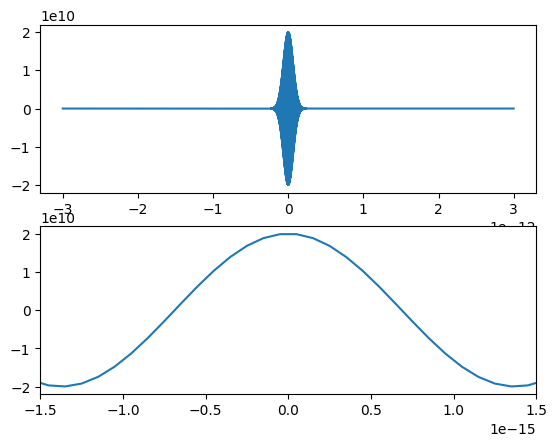

In [7]:
import numpy as np 
import torch 
import scipy.constants as c 


def Efield(t,P,wl,pw,t0):
    E= np.zeros(len(t),complex) #initialize efield 
    r = 50.0e-6 #set focal spot size
    RR= 79.8e6  #set rep rate   
    for i,Pi in enumerate(P):
        Psi = Pi/(np.pi*r**2)/RR #energetic flux per pulse joules/m^2  
        E0 = Psi
        om = np.pi*2*c.c/wl[i]
        sig = pw/(2*np.sqrt(2*np.log(2)))
        print(sig)
        E+= E0/np.sqrt(sig**2*np.pi*2)*np.exp(1.0j*om*t)*np.exp(-1/2*((t-t0[i])/sig)**2)
    return E 


import numpy as np 
import matplotlib.pyplot as plt 

#parameters of excting field
ts =  -3e-12  #s time window start of measurement
te =  3e-12  #s time window end of measurment 
dt = .1e-15 #time resolution  
P = [.002] #mW power
wl = [823.0e-9] #m wavelength of exciting pulse
pw =  150e-15 #fs pulse width of excitation (fwhm)  
t0 = [0]

t = np.linspace(ts,te,int(np.ceil((te-ts)/dt)+1))
E = Efield(t,P,wl,pw,t0)

fig,ax = plt.subplots(2)
ax[0].plot(t,E)
ax[1].plot(t,E)
ax[1].set_xlim(-pw*.01,pw*.01)
fig.show()
print(np.sum(dt*E))

In [8]:
1/.00044

2272.7272727272725

In [10]:
1/np.sqrt(2)

0.7071067811865475

In [13]:
import torch as t 
n = 2 
t.zeros((n,n))

tensor([[0., 0.],
        [0., 0.]])

In [16]:
2261946710584651.0e-12-2288762536219748.5e-12

-26.815825635097553

In [17]:
2261946710584651.0e-12

2261.946710584651